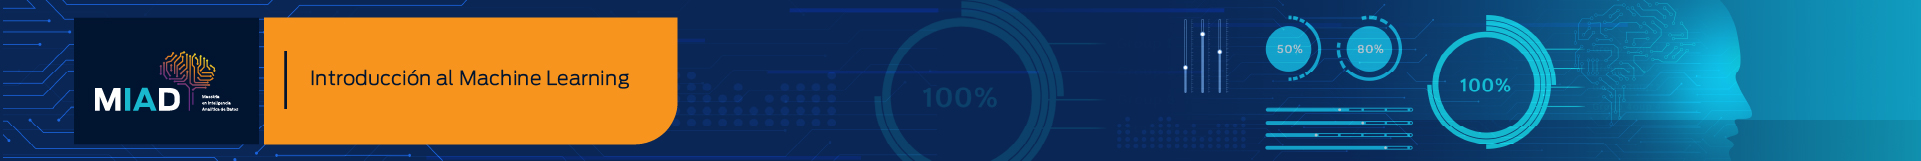

# Introducción al Machine Learning - Semana 3
## Caso: Implementación de modelos de clasificación lineales

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de linear discriminant analysis, quadratic discriminant analysis, naive bayes classifier y regresión logística.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación modelo LDA: Se estima el modelo usando LDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo QDA: Se estima el modelo usando QDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo NBC: Se estima el modelo usando NBC, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de regresión logística: Se estima el modelo usando regresión logística, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos] 


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "SMarket", la cual contiene 8 variables predictivas sobre el índice financiero S&P500 y 1250 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará al día siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-smarket

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [2]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

### Librerías a importar
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings

In [3]:
#Lectura de archivo fuente
df = pd.read_csv('./dataset-18213.csv')
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [64]:
#Dimensiones originales de dataset
df.shape

(1250, 9)

In [131]:
#Lectura de archivo fuente
df = pd.read_csv('./dataset-18213.csv')
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [132]:
#Eliminando observaciones con datos faltantes
df.dropna(how='any', axis=0, inplace=True)

#Dimensiones de dataset post cambios
df.shape

(1250, 9)

In [133]:
#Estadísticas descriptivas
for i, col in enumerate(df.columns):
    print(df[col].describe(), '\n')

count    1250.000000
mean     2003.016000
std         1.409018
min      2001.000000
25%      2002.000000
50%      2003.000000
75%      2004.000000
max      2005.000000
Name: Year, dtype: float64 

count    1250.000000
mean        0.003834
std         1.136299
min        -4.922000
25%        -0.639500
50%         0.039000
75%         0.596750
max         5.733000
Name: Lag1, dtype: float64 

count    1250.000000
mean        0.003919
std         1.136280
min        -4.922000
25%        -0.639500
50%         0.039000
75%         0.596750
max         5.733000
Name: Lag2, dtype: float64 

count    1250.000000
mean        0.001716
std         1.138703
min        -4.922000
25%        -0.640000
50%         0.038500
75%         0.596750
max         5.733000
Name: Lag3, dtype: float64 

count    1250.000000
mean        0.001636
std         1.138774
min        -4.922000
25%        -0.640000
50%         0.038500
75%         0.596750
max         5.733000
Name: Lag4, dtype: float64 

count    1250.0

#### Conclusiones Punto 1

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 1)

#### Carga y Partición de Datos

In [4]:
# Carga de Datos

XTotal = df.drop(['Direction'], axis=1).to_numpy()
YTotal = df['Direction'].to_numpy()

#Partición de datos
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, YTotal, test_size=0.33, random_state=0)

### 2. Estimación modelo LDA (20 puntos)
Estimen un modelo predictivo con LDA usando la muestra de entrenamiento, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [14]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(XTrain, yTrain)

prediccionesLDA=clfLDA.predict(XTest)
prediccionesProbLDA=clfLDA.predict_proba(XTest)

errorLDA=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesLDA[i]):
        errorLDA+=1/len(yTest)
        
print('El error de clasificación para LDA en la muestra de test es:')
print(round(errorLDA,6))

El error de clasificación para LDA en la muestra de test es:
0.05569


#### Matriz de confusión

In [15]:
print(confusion_matrix(y_true=yTest, y_pred=prediccionesLDA))

[[186  21]
 [  2 204]]


#### Accuracy

In [16]:
accuracyLDA=accuracy_score(y_true=yTest, y_pred=prediccionesLDA)
print(round(accuracyLDA,6))

0.94431


#### Precision

In [17]:
precisionLDA=precision_score(y_true=yTest, y_pred=prediccionesLDA, pos_label='Up')
print(round(precisionLDA,6))

0.906667


#### Curva ROC y AUC

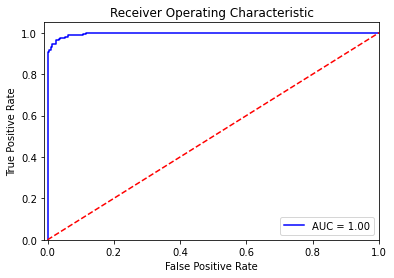

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbLDA[:,1], pos_label='Up')
AUCLDA=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCLDA)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Comparación de métricas

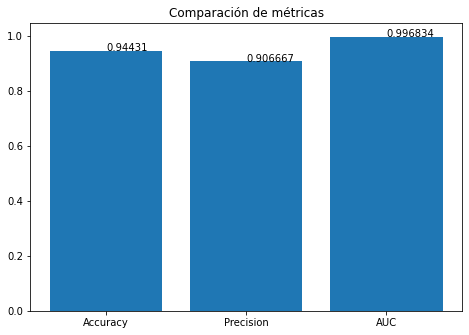

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de métricas")
ejeX = ['Accuracy', 'Precision','AUC']
ejeY = [round(accuracyLDA,6),round(precisionLDA,6),round(AUCLDA,6)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### 3. Estimación modelo QDA (20 puntos)
Estimen un modelo predictivo usando QDA, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [41]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(XTrain, yTrain)

prediccionesQDA=clfQDA.predict(XTest)
prediccionesProbQDA=clfQDA.predict_proba(XTest)

errorQDA=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesQDA[i]):
        errorQDA+=1/len(yTest)
        
print('El error de clasificación para QDA en la muestra de test es:')
print(round(errorQDA,6))

El error de clasificación para QDA en la muestra de test es:
0.072639


#### Matriz de confusión

In [42]:
print(confusion_matrix(y_true=yTest, y_pred=prediccionesQDA))

[[185  22]
 [  8 198]]


#### Accuracy

In [43]:
accuracyQDA=accuracy_score(y_true=yTest, y_pred=prediccionesQDA)
print(round(accuracyQDA,6))

0.927361


#### Precision

In [44]:
precisionQDA=precision_score(y_true=yTest, y_pred=prediccionesQDA, pos_label='Up')
print(round(precisionQDA,6))

0.9


#### Curva ROC y AUC

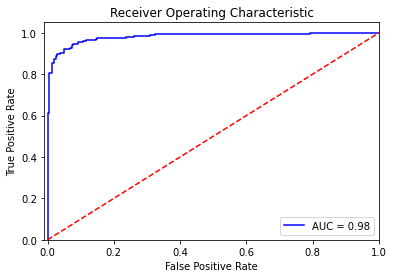

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbQDA[:,1], pos_label='Up')
AUCQDA=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCQDA)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Comparación de métricas

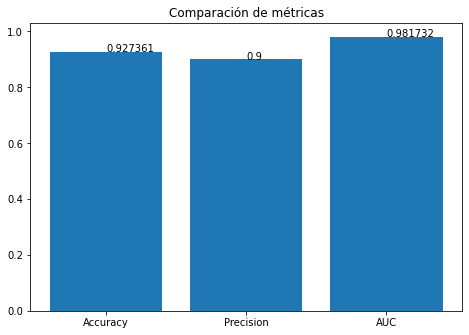

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de métricas")
ejeX = ['Accuracy', 'Precision','AUC']
ejeY = [round(accuracyQDA,6),round(precisionQDA,6),round(AUCQDA,6)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### 4. Estimación modelo NBC (20 puntos)
Predigan usando Naive Bayes Classifier y evalúen su poder predictivo en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [47]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

clfNB = GaussianNB()
clfNB.fit(XTrain, yTrain)

prediccionesNB=clfNB.predict(XTest)
prediccionesProbNB=clfNB.predict_proba(XTest)

errorNB=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesNB[i]):
        errorNB+=1/len(yTest)
        
print('El error de clasificación para Naive Bayes en la muestra de test es:')
print(round(errorNB,6))

El error de clasificación para Naive Bayes en la muestra de test es:
0.046005


#### Matriz de confusión

In [48]:
print(confusion_matrix(y_true=yTest, y_pred=prediccionesNB))

[[190  17]
 [  2 204]]


#### Accuracy

In [49]:
accuracyNB=accuracy_score(y_true=yTest, y_pred=prediccionesNB)
print(round(accuracyNB,6))

0.953995


#### Precision

In [50]:
precisionNB=precision_score(y_true=yTest, y_pred=prediccionesNB, pos_label='Up')
print(round(precisionNB,6))

0.923077


#### Curva ROC y AUC

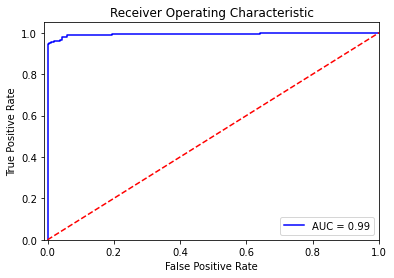

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbNB[:,1], pos_label='Up')
AUCNB=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCNB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Comparación de métricas

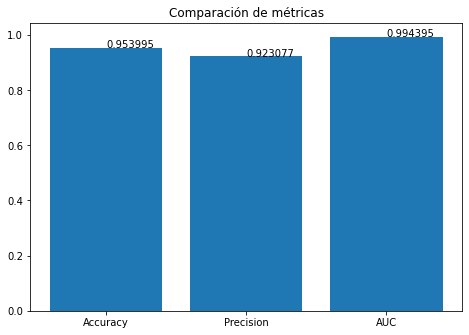

In [52]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de métricas")
ejeX = ['Accuracy', 'Precision','AUC']
ejeY = [round(accuracyNB,6),round(precisionNB,6),round(AUCNB,6)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### 5. Estimación modelo regresión logística (20 puntos)
Predigan usando un modelo de regresión logística y evalúen en test. Concluyan sobre el poder predictivo del modelo estimado.

In [32]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(XTrain,yTrain)

prediccionesRegLog=clfRegLog.predict(XTest)
prediccionesProbRegLog=clfRegLog.predict_proba(XTest)

errorRegLog=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesRegLog[i]):
        errorRegLog+=1/len(yTest)
        
print('El error de clasificación para la regresión logística en la muestra de test es:')
print(round(errorRegLog,6))

El error de clasificación para la regresión logística en la muestra de test es:
0.024213


#### Matriz de confusión

In [33]:
print(confusion_matrix(y_true=yTest, y_pred=prediccionesRegLog))

[[199   8]
 [  2 204]]


#### Accuracy

In [34]:
accuracyRegLog=accuracy_score(y_true=yTest, y_pred=prediccionesRegLog)
print(round(accuracyRegLog,6))

0.975787


#### Precision

In [39]:
precisionRegLog=precision_score(y_true=yTest, y_pred=prediccionesRegLog, pos_label='Up')
print(round(precisionRegLog,6))

0.962264


#### Curva ROC y AUC

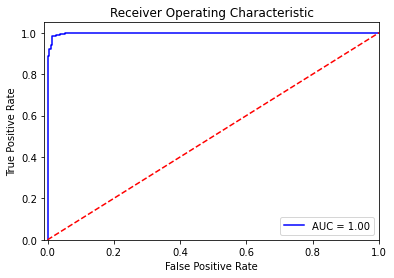

In [36]:
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProbRegLog[:,1], pos_label='Up')
AUCRegLog=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Comparación de métricas

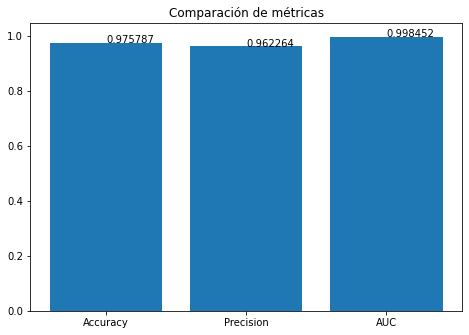

In [37]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de métricas")
ejeX = ['Accuracy', 'Precision','AUC']
ejeY = [round(accuracyRegLog,6),round(precisionRegLog,6),round(AUCRegLog,6)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### 6. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

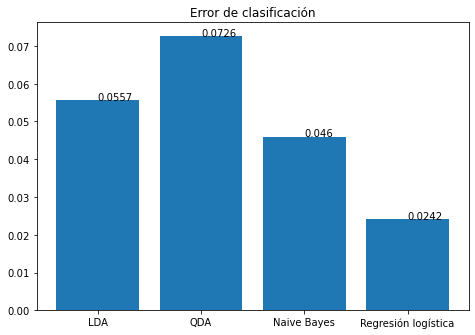

In [171]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Error de clasificación")
ejeX = ['LDA','QDA','Naive Bayes','Regresión logística']
ejeY = [round(errorLDA,6),round(errorQDA,6),round(errorNB,6),round(errorRegLog,6)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

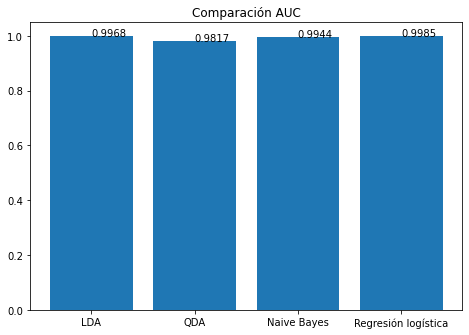

In [172]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación AUC")
ejeX = ['LDA','QDA','Naive Bayes','Regresión logística']
ejeY = [round(AUCLDA,6),round(AUCQDA,6),round(AUCNB,6),round(AUCRegLog,6)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

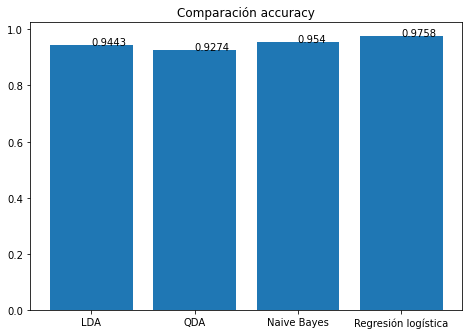

In [173]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación accuracy")
ejeX = ['LDA','QDA','Naive Bayes','Regresión logística']
ejeY = [round(accuracyLDA,4),round(accuracyQDA,6),round(accuracyNB,6),round(accuracyRegLog,6)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

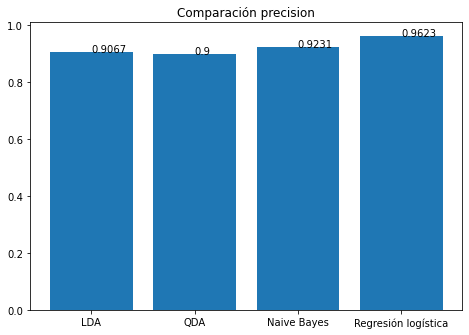

In [174]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación precision")
ejeX = ['LDA','QDA','Naive Bayes','Regresión logística']
ejeY = [round(precisionLDA,6),round(precisionQDA,6),round(precisionNB,6),round(precisionRegLog,6)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

#### Conclusiones Punto 6

Como se observa en la primera gráfica (Error de clasificación), el modelo de Regresión Logística obtuvo el mejor desempeño, conclusión sustentada, también, en la Comparación de Precisión y AUC.

Es de esperar que el modelo de Regresión Logística tenga un mejor resultado toda vez que su clasificación se fundamente en la probabilidad de una observación de pertenecer a una clasificación según sus características o parámetros, mientras que LDA asume distribución normal de los datos, QDA parte de diferencia en las covarianzas de los grupos y Naive Bayes asume independencia de los datos.